In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r'data_cj.xlsx')

In [4]:
df.head(3)

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,lon,lat
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,18.068581,59.329324
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,-3.010113,53.645708
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,4.892360,44.933393


In [5]:
# check=df['Ship Mode'].value_counts()
check=df['Customer Name'].value_counts()
check

Jose Gambino       13
Kayla Tearle       12
Mark Washington    12
Maya Pamphlett     11
Patricia Smith     11
                   ..
Grace Brown         1
Louie Bryant        1
Bella Handfield     1
Audrey Prentice     1
Jay Collier         1
Name: Customer Name, Length: 792, dtype: int64

Text(0.5, 1.0, 'Red:Segment and Blue:Region to Ship Mode')

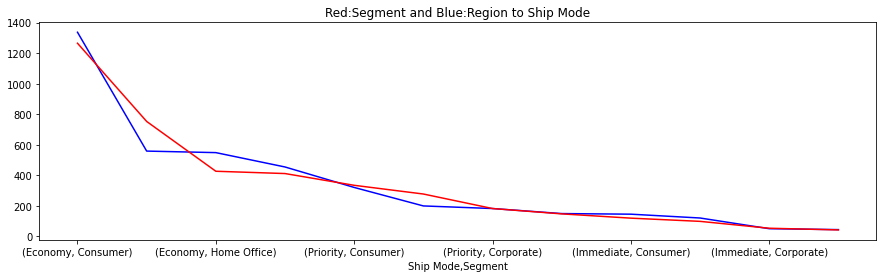

In [6]:
groReg_df=df.groupby('Ship Mode')['Region'].value_counts().sort_values(ascending=False)
groSeg_df=df.groupby('Ship Mode')['Segment'].value_counts().sort_values(ascending=False)
groReg_df.plot.line(figsize=(15,4),color="blue")
groSeg_df.plot.line(color="red")

plt.title("Red:Segment and Blue:Region to Ship Mode")

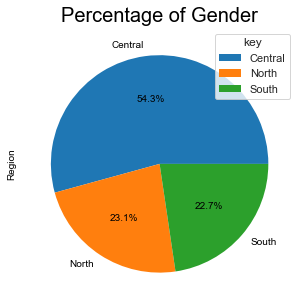

In [7]:
reg=df['Region'].value_counts()
reg.plot.pie(figsize=(8,5),autopct='%1.1f%%')
sns.set_theme(style='white')

plt.title("Percentage of Gender", size=20)
plt.legend(loc='upper right', title='key') 
plt.show()

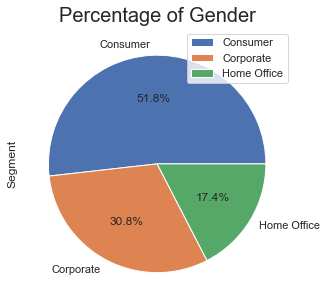

In [8]:
segm=df['Segment'].value_counts()
segm.plot.pie(figsize=(8,5),autopct='%1.1f%%')
sns.set_theme(style='white')

plt.title("Percentage of Gender", size=20)
plt.legend(loc='upper right') 
plt.show()

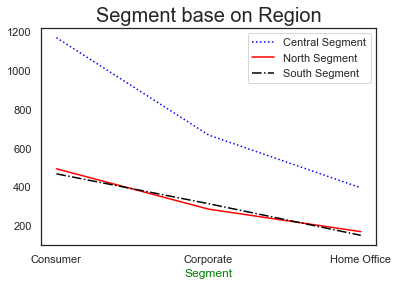

In [9]:
cent_reg=df[(df['Region']=="Central")&(df['Segment'])]
cent_reg=cent_reg['Segment'].value_counts().sort_values(ascending=False)

nort_reg=df[(df['Region']=="North")&(df['Segment'])]
nort_reg=nort_reg['Segment'].value_counts().sort_values(ascending=False)

sout_reg=df[(df['Region']=="South")&(df['Segment'])]
sout_reg=sout_reg['Segment'].value_counts().sort_values(ascending=False)


plt.plot(cent_reg, label='Central Segment',linestyle=':',color='blue')  
plt.plot(nort_reg, label='North Segment',linestyle='-',color='red')  
plt.plot(sout_reg, label='South Segment',linestyle='-.',color='black')
plt.title("Segment base on Region", size=20)
plt.xlabel("Segment",color='green')
plt.legend()
plt.show()

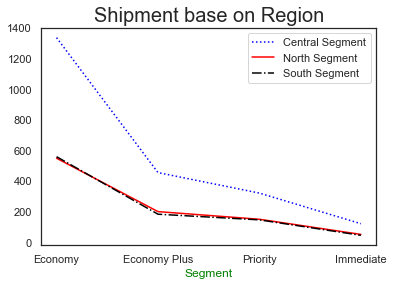

In [10]:
ship_cent_reg=df[(df['Region']=="Central")&(df['Ship Mode'])]
ship_cent_reg=ship_cent_reg['Ship Mode'].value_counts()

ship_nort_reg=df[(df['Region']=="North")&(df['Ship Mode'])]
ship_nort_reg=ship_nort_reg['Ship Mode'].value_counts()

ship_sout_reg=df[(df['Region']=="South")&(df['Ship Mode'])]
ship_sout_reg=ship_sout_reg['Ship Mode'].value_counts()



plt.plot(ship_cent_reg, label='Central Segment',linestyle=':',color='blue')  
plt.plot(ship_nort_reg, label='North Segment',linestyle='-',color='red')  
plt.plot(ship_sout_reg, label='South Segment',linestyle='-.',color='black')
plt.title("Shipment base on Region", size=20)
plt.xlabel("Segment",color='green')
plt.legend()
plt.show()

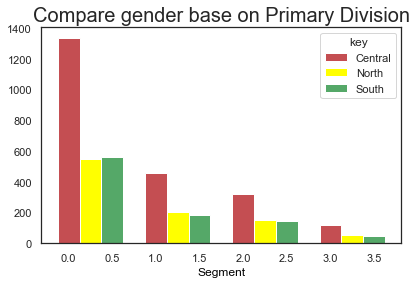

In [11]:
fig=plt.figure(figsize=(5,3))
x=np.arange(4)
width=0.25
ax=fig.add_axes([0,0,1,1])

ax.bar(x+0.00,ship_cent_reg, label='Central',color='r',width=width)
ax.bar(x+0.25,ship_nort_reg, label='North',color='yellow',width=width)
ax.bar(x+0.50,ship_sout_reg, label='South',color='g',width=width)

plt.title("Compare gender base on Primary Division", size=20)
plt.legend(title="key")
plt.xlabel("Segment",color='black')
plt.show()